In [1]:
# Load
library("tm")
library("SnowballC")

library("wordcloud")
library("RColorBrewer")
library("lsa")
library("lda")

Loading required package: NLP
Loading required package: RColorBrewer


In [2]:
candidates <- c("F:\\IITC\\ADM\\HW\\HW1\\20news-bydate\\20news-bydate-test\\comp.sys.ibm.pc.hardware","F:\\IITC\\ADM\\HW\\HW1\\20news-bydate\\20news-bydate-test\\comp.sys.mac.hardware","F:\\IITC\\ADM\\HW\\HW1\\20news-bydate\\20news-bydate-test\\sci.electronics", "F:\\IITC\\ADM\\HW\\HW1\\20news-bydate\\20news-bydate-test\\comp.windows.x")

str(candidates)

 chr [1:4] "F:\\IITC\\ADM\\HW\\HW1\\20news-bydate\\20news-bydate-test\\comp.sys.ibm.pc.hardware" ...


In [3]:
news <- Corpus(DirSource(candidates, recursive=TRUE),readerControl = list(reader=readPlain))

In [4]:
news

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1565

In [5]:
tdm <- TermDocumentMatrix(news, control=list(wordLengths=c(4,Inf))) #Term Document Matrix 

str(tdm)



List of 6
 $ i       : int [1:158539] 3467 3468 5316 10175 11599 12337 18734 18778 19203 19840 ...
 $ j       : int [1:158539] 1 1 1 1 1 1 1 1 1 1 ...
 $ v       : num [1:158539] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 43543
 $ ncol    : int 1565
 $ dimnames:List of 2
  ..$ Terms: chr [1:43543] "\002ubject:" "\020where" "''&1t8cpin" "'-/165#" ...
  ..$ Docs : chr [1:1565] "60721" "60738" "60741" "60742" ...
 - attr(*, "class")= chr [1:2] "TermDocumentMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [6]:
#Verify Frequent Terms 
m <- as.matrix(tdm)

str(m)


 num [1:43543, 1:1565] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ Terms: chr [1:43543] "\002ubject:" "\020where" "''&1t8cpin" "'-/165#" ...
  ..$ Docs : chr [1:1565] "60721" "60738" "60741" "60742" ...


In [7]:
v <- sort(rowSums(m), decreasing=TRUE) 

str(v)


 Named num [1:43543] 2798 2106 1950 1896 1648 ...
 - attr(*, "names")= chr [1:43543] "that" "with" "have" "this" ...


In [8]:
d <- data.frame(word = names(v),freq=v) 

str(d)



'data.frame':	43543 obs. of  2 variables:
 $ word: Factor w/ 43543 levels "\002ubject:",..: 39247 42172 22775 39411 38182 21472 26131 31318 21466 42358 ...
 $ freq: num  2798 2106 1950 1896 1648 ...


In [9]:
head(d, 10)

,word,freq
that,that,2798
with,with,2106
have,have,1950
this,this,1896
subject:,subject:,1648
from:,from:,1594
lines:,lines:,1567
organization:,organization:,1530
from,from,1045
would,would,906


In [10]:
 news <- tm_map(news, removeWords,"Subject") 
 news <- tm_map(news, removeWords,"Organization") 
 news <- tm_map(news, removeWords,"writes") 
 news <- tm_map(news, removeWords,"From") 
 news <- tm_map(news, removeWords,"lines") 
 news <- tm_map(news, removeWords," NNTP-Posting-Host") 
 news <- tm_map(news, removeWords,"article")


In [11]:
news <- tm_map(news, tolower) ## Convert to Lower Case 

news <- tm_map(news, removeWords, stopwords("english")) ## Remove Stopwords 

news <- tm_map(news, removePunctuation) ## Remove Punctuations 

news <- tm_map(news, stemDocument) ## Stemming 

news <- tm_map(news, removeNumbers) ## Remove Numbers 

news <- tm_map(news, stripWhitespace) ## Eliminate Extra White Spaces 

news <- tm_map(news , PlainTextDocument)


In [12]:
dtm <- DocumentTermMatrix(news,control=list(wordLengths=c(4,Inf)))
dtm
dim(dtm)

<<DocumentTermMatrix (documents: 1565, terms: 23850)>>
Non-/sparse entries: 109750/37215500
Sparsity           : 100%
Maximal term length: 106
Weighting          : term frequency (tf)

[1]  1565 23850

In [13]:
tdm <- TermDocumentMatrix(news, control=list(wordLengths=c(4,Inf))) #Term Document Matrix 
tdm
#Verify Frequent Terms 
m <- as.matrix(tdm)
 
v <- sort(rowSums(m), decreasing=TRUE) 

d <- data.frame(word = names(v),freq=v) 






<<TermDocumentMatrix (terms: 23850, documents: 1565)>>
Non-/sparse entries: 109750/37215500
Sparsity           : 100%
Maximal term length: 106
Weighting          : term frequency (tf)

In [14]:
str(d)

'data.frame':	23850 obs. of  2 variables:
 $ word: Factor w/ 23850 levels "\002ubject","aaaaa",..: 10891 22637 14299 10355 20237 10036 21529 10856 16195 532 ...
 $ freq: num  1568 848 715 651 648 ...


In [15]:
head(d, 10)

,word,freq
lines,lines,1568
will,will,848
nntppostinghost,nntppostinghost,715
know,know,651
system,system,648
just,just,640
university,university,609
like,like,535
problem,problem,530
also,also,515


In [16]:
dtms <- removeSparseTerms(dtm, 0.15) # Prepare the data 

str(dtms)
dim(dtms)

List of 6
 $ i       : int [1:1557] 1 2 3 4 5 6 7 8 9 10 ...
 $ j       : int [1:1557] 1 1 1 1 1 1 1 1 1 1 ...
 $ v       : num [1:1557] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 1565
 $ ncol    : int 1
 $ dimnames:List of 2
  ..$ Docs : chr [1:1565] "character(0)" "character(0)" "character(0)" "character(0)" ...
  ..$ Terms: chr "lines"
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


[1] 1565    1

In [17]:
freq <- colSums(as.matrix(dtm)) # Find word frequencies 
str(freq)


 Named num [1:23850] 1 2 1 2 1 1 3 3 3 2 ...
 - attr(*, "names")= chr [1:23850] "\002ubject" "aaaaa" "aaaread" "aachen" ...


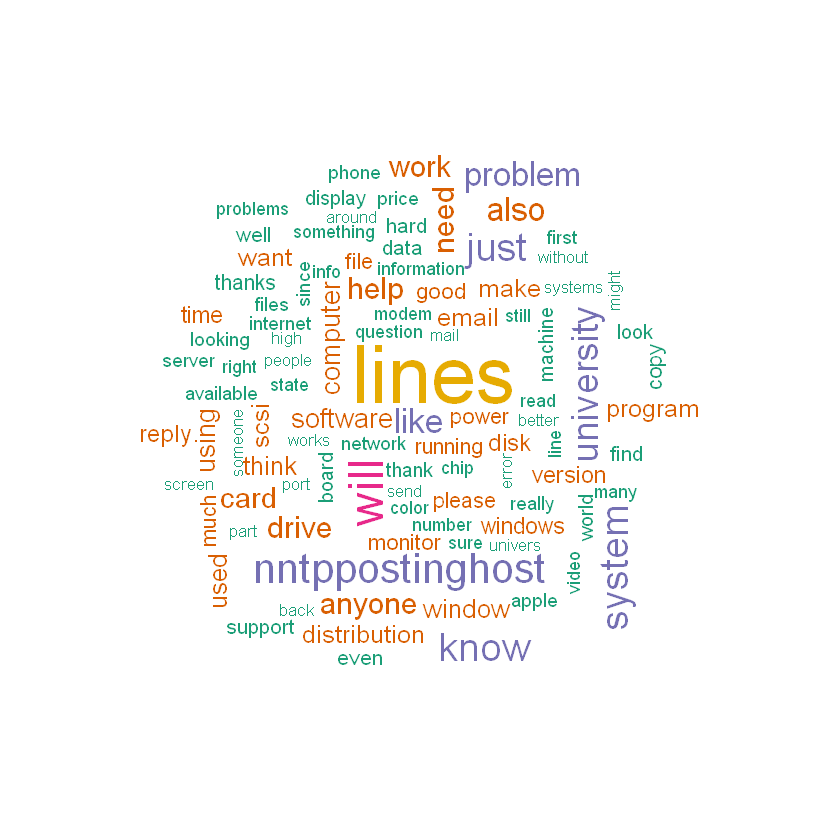

In [18]:
dark2 <- brewer.pal(6, "Dark2") 

wordcloud(names(freq), freq, max.words=100, rot.per=0.2, colors=dark2)


In [19]:
#dtm_tfxidf2<- weightTfIdf(dtm)

In [20]:
#dtm_tfxidf2

In [21]:
#svd_out <- svd(scale(dtm))

In [22]:
#str(svd_out)

In [23]:
#str(svd_out)

In [24]:
#s <- svd(dtms,nu=5,nv=5,LINPACK = FALSE)


In [25]:
#str(s)

In [26]:
#s <- svd(dtm,nu=15,nv=15,LINPACK = FALSE)


In [27]:
s = svd(dtm)

In [28]:
ds <- diag(s$d[1:50])  # let's now use the first three values
us <- as.matrix(s$u[,1:50])
vs <- as.matrix(s$v[,1:50])
m.approx2 <- us %*% ds %*% t(vs)
m.approx2   # m.approx2 will never be a worst approximation than m.approx1



8.674196e-04,-7.275106e-04,0.0032383938,9.223089e-05,3.653096e-04,1.559819e-03,0.0017182604,-5.177336e-05,2.195558e-03,-9.851726e-05,...,1.781064e-04,1.781064e-04,0.0001792064,4.141557e-03,4.141557e-03,0.0008965046,-3.493832e-04,-1.327780e-04,4.141557e-03,4.141557e-03
-7.853256e-04,6.330317e-03,-0.0076237416,8.386753e-03,-1.330091e-03,-2.382251e-03,-0.0072512202,3.205259e-06,-1.247371e-03,-9.249243e-03,...,7.107643e-04,7.107643e-04,0.0002566947,2.864116e-03,2.864116e-03,-0.0002327049,6.776849e-03,-2.213495e-03,2.864116e-03,2.864116e-03
1.124965e-03,-2.825948e-03,-0.0008722850,2.479439e-03,4.698127e-04,1.780582e-03,0.0066894726,-3.911405e-03,3.325237e-03,2.526887e-03,...,-4.530565e-04,-4.530565e-04,0.0011122528,-2.276479e-03,-2.276479e-03,0.0041102675,-4.846956e-04,1.599219e-03,-2.276479e-03,-2.276479e-03
7.739660e-04,-6.839982e-03,-0.0004713790,5.574833e-04,3.828394e-04,1.039108e-03,0.0062376675,4.679844e-04,1.733305e-03,3.032761e-03,...,-6.056387e-05,-6.056387e-05,-0.0005785018,-2.385611e-03,-2.385611e-03,-0.0007812760,8.433749e-04,5.014883e-04,-2.385611e-03,-2.385611e-03
5.324444e-04,7.111412e-03,0.0077313500,5.985662e-04,1.695207e-04,6.104356e-04,-0.0022887782,1.324404e-03,1.403943e-03,2.043404e-03,...,1.068247e-03,1.068247e-03,0.0131306234,3.332806e-03,3.332806e-03,0.0015666201,2.840184e-03,9.083184e-04,3.332806e-03,3.332806e-03
6.276521e-04,-2.550500e-03,0.0010651570,2.310014e-03,-2.011635e-04,1.014879e-03,0.0033468537,-3.876380e-03,2.818105e-03,-5.888845e-04,...,-1.058004e-03,-1.058004e-03,0.0016263234,-8.780394e-06,-8.780394e-06,-0.0013264129,4.545762e-04,2.084677e-03,-8.780394e-06,-8.780394e-06
-3.140367e-04,-1.307934e-02,0.0027363523,-2.715025e-03,-1.209354e-03,4.455798e-04,-0.0002292056,-2.424236e-05,-3.082200e-03,-5.473281e-03,...,1.597083e-03,1.597083e-03,0.0050256194,1.521186e-03,1.521186e-03,-0.0038115001,4.079359e-03,3.700495e-03,1.521186e-03,1.521186e-03
3.798629e-04,1.367903e-03,0.0018867099,1.683151e-03,8.140968e-05,4.345176e-05,0.0011063026,-2.235590e-03,1.836083e-03,4.419812e-04,...,1.728710e-03,1.728710e-03,0.0014731843,1.611566e-03,1.611566e-03,-0.0026725756,9.944028e-04,5.108764e-05,1.611566e-03,1.611566e-03
3.093565e-04,2.096008e-03,-0.0001786762,1.950278e-03,1.278691e-04,2.918069e-04,-0.0006305987,3.226616e-03,2.152945e-03,-6.525126e-06,...,-5.013462e-05,-5.013462e-05,-0.0005803146,-4.340314e-04,-4.340314e-04,0.0049061828,5.111406e-05,1.798483e-03,-4.340314e-04,-4.340314e-04
1.257248e-03,5.999574e-03,0.0039897643,3.998354e-03,1.134732e-03,-3.737026e-05,0.0060815056,3.661247e-03,5.036143e-03,2.745360e-03,...,-9.861095e-04,-9.861095e-04,-0.0001924205,-3.404246e-03,-3.404246e-03,0.0045526555,-5.810384e-04,-1.943838e-03,-3.404246e-03,-3.404246e-03
5.297120e-04,2.465573e-03,0.0022338563,4.363622e-03,1.921303e-03,-1.017620e-03,0.0020079015,2.153093e-02,6.707430e-03,4.616845e-03,...,-3.584725e-03,-3.584725e-03,-0.0002355865,-3.755193e-03,-3.755193e-03,-0.0299376544,7.948326e-03,1.345496e-03,-3.755193e-03,-3.755193e-03


In [29]:
# we could compute the sum of squared errors
approx.error <- function(m1,m2) {
  sum((m1-m2)^2)
}
approx.error(dtm,m.approx2)

[1] 146788.2

In [30]:
ds <- diag(s$d[1:100])  # let's now use the first three values
us <- as.matrix(s$u[,1:100])
vs <- as.matrix(s$v[,1:100])
m.approx3 <- us %*% ds %*% t(vs)
m.approx3   # m.approx2 will never be a worst approximation than m.approx1



1.614663e-03,-0.0064360160,0.004516091,3.084076e-03,1.498243e-03,0.0051792576,0.0016278606,-0.0026458282,-0.0009616807,-3.472796e-04,...,1.153022e-04,1.153022e-04,-7.705301e-04,0.0024106017,0.0024106017,-1.108446e-02,-6.070464e-03,-0.0007747259,0.0024106017,0.0024106017
-4.306473e-03,-0.0108212858,-0.062097642,-7.362929e-03,-8.878269e-03,-0.0020605335,0.0072449746,0.0116365301,-0.0116218043,-3.046942e-02,...,-2.038531e-03,-2.038531e-03,-2.924561e-03,-0.0029675927,-0.0029675927,7.462699e-03,2.348999e-02,0.0019286137,-0.0029675927,-0.0029675927
1.158042e-03,-0.0021899256,-0.001288992,1.975648e-03,2.472237e-03,0.0026735453,0.0102017865,-0.0042643537,0.0030438068,1.490451e-03,...,-4.712345e-04,-4.712345e-04,7.450329e-04,-0.0006508840,-0.0006508840,2.361350e-03,-2.265587e-04,0.0008687036,-0.0006508840,-0.0006508840
7.572003e-04,-0.0038618801,-0.010681137,-7.384360e-04,1.661700e-03,0.0005608197,0.0050159734,-0.0083115355,0.0016124679,-6.745784e-04,...,-4.114047e-04,-4.114047e-04,8.822991e-04,-0.0017461508,-0.0017461508,5.718335e-03,-1.193475e-03,0.0004540490,-0.0017461508,-0.0017461508
2.165330e-04,0.0259714161,0.003648311,-6.259294e-04,-3.618052e-03,0.0023530517,-0.0127794198,0.0067894640,-0.0053004513,-1.258731e-02,...,-6.348230e-04,-6.348230e-04,9.763357e-03,-0.0013044160,-0.0013044160,-6.241441e-05,-2.783437e-03,0.0065884383,-0.0013044160,-0.0013044160
1.001803e-03,0.0014602181,0.010075080,3.535380e-04,8.199937e-04,0.0016017889,0.0048242550,-0.0067961088,-0.0007751090,-3.124956e-05,...,-8.282192e-04,-8.282192e-04,-5.973541e-05,-0.0012045699,-0.0012045699,-1.291305e-03,2.804654e-03,0.0030333032,-0.0012045699,-0.0012045699
6.215440e-04,0.0027119042,-0.021151826,-3.427848e-04,-4.821570e-03,0.0040926505,-0.0127503312,-0.0182720564,-0.0097113165,-2.037022e-02,...,-7.505797e-04,-7.505797e-04,1.144826e-03,-0.0013898237,-0.0013898237,-2.077210e-02,-9.450266e-03,0.0169007652,-0.0013898237,-0.0013898237
7.659163e-04,0.0023606165,0.001733951,1.023169e-03,6.062897e-04,-0.0005603446,-0.0024075107,-0.0015638351,-0.0000764839,-2.416753e-03,...,1.313781e-03,1.313781e-03,1.714440e-03,0.0006295203,0.0006295203,5.839176e-03,-6.971552e-04,0.0004741272,0.0006295203,0.0006295203
1.380015e-04,-0.0034751033,-0.006282708,1.569003e-03,4.058840e-04,0.0005538587,-0.0006546161,0.0073173309,-0.0012399414,-5.021430e-03,...,-2.924642e-04,-2.924642e-04,-6.841894e-04,-0.0012377250,-0.0012377250,-3.116834e-03,3.437636e-04,0.0020697413,-0.0012377250,-0.0012377250
1.685525e-03,-0.0090635523,0.005244457,5.389539e-03,5.271573e-04,0.0009241339,0.0046335901,0.0068657313,0.0056250236,4.675791e-03,...,-6.151820e-04,-6.151820e-04,-1.271573e-04,-0.0018225182,-0.0018225182,7.286274e-03,1.913292e-03,-0.0045523643,-0.0018225182,-0.0018225182
-1.483949e-03,-0.0053473398,-0.018267707,-1.068212e-03,-5.809423e-03,-0.0076511739,-0.0097578849,0.0354573948,0.0299365337,-1.679365e-02,...,1.294439e-03,1.294439e-03,3.699973e-03,0.0005487397,0.0005487397,-1.133586e-01,-1.011909e-02,-0.0022586853,0.0005487397,0.0005487397


In [31]:
# we could compute the sum of squared errors
approx.error <- function(m1,m2) {
  sum((m1-m2)^2)
}
approx.error(dtm,m.approx3)

[1] 115473.1

In [32]:
library(cluster)
library(NbClust)

In [33]:
#dtm

In [35]:
set.seed(1234)
nc <- NbClust(dtm, min.nc=2, max.nc=15, method="kmeans") 
table(nc$Best.n[1,])

ERROR: Error: cannot allocate vector of size 4.2 Gb


In [ ]:
set.seed(123) 
km.res <- kmeans(dtm, k=100, nstart = 25)
# k-means group number of each observation
km.res$cluster

In [ ]:
# Visualize k-means clusters
fviz_cluster(km.res, data = dtm, geom = "point", stand = FALSE, frame.type = "norm")